In [1]:
import json
import requests
from bs4 import BeautifulSoup
import numpy as np
import time
import pandas as pd
import re
import time
import pickle
from IPython.display import clear_output
import urllib
from threading import Thread

In [90]:
ug = pd.read_csv('user_games.csv')
g = pd.read_csv('games.csv')

In [82]:
l2 = list(g['game_link'].apply(lambda x: int(x.split('/')[4])))

In [83]:
l1 = list(ug['appid'].values)

In [84]:
l1 = list(set(l1))

In [85]:
l2 = list(set(l2))

In [86]:
len(l1)

11816

In [87]:
len(l2)

7178

In [88]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3
len(intersection(l2, l1))

5129

In [91]:
ug['user'].drop_duplicates()

0           https://steamcommunity.com/profiles/7656119839...
26                  https://steamcommunity.com/id/Dahottness/
52                    https://steamcommunity.com/id/ryndrrr_/
78                       https://steamcommunity.com/id/ayeel/
104                   https://steamcommunity.com/id/ath3ris_/
                                  ...                        
27547503              https://steamcommunity.com/id/heads-up/
27547529                https://steamcommunity.com/id/DeVeer/
27547555    https://steamcommunity.com/profiles/7656119833...
27547581    https://steamcommunity.com/profiles/7656119828...
27547607               https://steamcommunity.com/id/LordEmp/
Name: user, Length: 9150, dtype: object

In [96]:
ug = pd.read_csv('user_games(allgames)_2.csv')
g = pd.read_csv('games.csv')

In [97]:
ug['user'].nunique()

4600

In [2]:
one = pd.read_csv('user_games(allgames).csv')

In [3]:
two = pd.read_csv('user_games(allgames)_2.csv')

In [4]:
three = pd.read_csv('user_games(allgames)_3.csv')

In [5]:
four = pd.read_csv('user_games(allgames)_4.csv')

In [ ]:
five = pd.DataFrame(ug_list)

In [13]:
one['user'] = one['user'].apply(lambda x:x.split('/')[3]+"/"+x.split('/')[4])
two['user'] = two['user'].apply(lambda x:x.split('/')[3]+"/"+x.split('/')[4])
three['user'] = three['user'].apply(lambda x:x.split('/')[3]+"/"+x.split('/')[4])
four['user'] = four['user'].apply(lambda x:x.split('/')[3]+"/"+x.split('/')[4])

In [44]:
five['user'] = five['user'].apply(lambda x:x.split('/')[3]+"/"+x.split('/')[4])

In [20]:
one = one.drop_duplicates()
two = two.drop_duplicates()
three = three.drop_duplicates()
four = four.drop_duplicates()

In [45]:
five = five.drop_duplicates()

In [47]:
final = pd.concat([one,two, three,four,five], axis=0)

In [48]:
final.nunique()

user             18316
appid            47748
hours_forever     6686
name             47487
dtype: int64

In [26]:
one.groupby('user')['appid'].count().sort_values()

user
profiles/76561198355621251        6
id/nadirxkiller                   8
id/ozzywizard                     9
id/-_AlohaYT__-                  10
profiles/76561199092202209       11
                              ...  
id/C0ZEN                      10052
id/JinxLGamez                 10169
id/maleverus                  10610
id/Houtworm91                 10787
id/thugnificent               12952
Name: appid, Length: 2150, dtype: int64

In [36]:
with open('C:\\Users\\Administrator\\Desktop\\AI\\Univ.ai\\DS-1\\Project\\games_data.pickle', 'rb') as f:
    profile_games = pickle.load(f)

In [38]:
ug_list = []
for i in profile_games.keys():
    if profile_games[i] != 'NA' and profile_games[i] != 'NILL':
        for game in profile_games[i]:
            ug = {}
            ug["user"] = i
            ug["appid"] = game["appid"]
            ug['name'] = game['name']
            if 'hours_forever' in list(game.keys()):
                ug['hours_forever'] = game["hours_forever"]
            ug_list.append(ug)

In [49]:
final.to_csv('final_user_games.csv')

<AxesSubplot:>

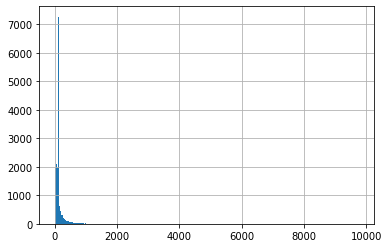

In [56]:
final[~final['hours_forever'].isna()].groupby('user')['appid'].count().sort_values().hist(bins=300)

In [61]:
final[~final['hours_forever'].isna()]

,user,appid,hours_forever,name
0,id/flutterdim,268500,"1,466",XCOM 2
1,id/flutterdim,582010,"1,434",Monster Hunter: World
2,id/flutterdim,200510,674,XCOM: Enemy Unknown
3,id/flutterdim,262060,578,Darkest Dungeon®
4,id/flutterdim,544750,516,SOULCALIBUR VI
...,...,...,...,...
1757806,profiles/76561199234730353,440,16.1,Team Fortress 2
1757807,profiles/76561199234730353,271590,9.4,Grand Theft Auto V
1757808,profiles/76561199234730353,438100,1.5,VRChat
1757809,profiles/76561199234730353,459220,1.0,Halo Wars: Definitive Edition


In [71]:
gs = pd.read_csv('games.csv')['url'].apply(lambda x:int(x.split('/')[4]))

In [75]:
s1 = set(list(gs))

In [76]:
s2 = set(list(final['appid']))

In [77]:
p = s2.intersection(s1)

In [79]:
len(p)

6994

In [81]:
len(s1)

7093

In [82]:
len(s2)

47748

In [83]:
final['appid'] = final['appid'].apply(lambda x:int(x))

In [90]:
count = 0
for i in final.appid:
    if i in s1:
        count +=1

In [97]:
final[final.appid.isin(s1)]

,user,appid,hours_forever,name
0,id/flutterdim,268500,"1,466",XCOM 2
1,id/flutterdim,582010,"1,434",Monster Hunter: World
2,id/flutterdim,200510,674,XCOM: Enemy Unknown
3,id/flutterdim,262060,578,Darkest Dungeon®
4,id/flutterdim,544750,516,SOULCALIBUR VI
...,...,...,...,...
1757805,profiles/76561199234730353,550,469,Left 4 Dead 2
1757807,profiles/76561199234730353,271590,9.4,Grand Theft Auto V
1757808,profiles/76561199234730353,438100,1.5,VRChat
1757809,profiles/76561199234730353,459220,1.0,Halo Wars: Definitive Edition


In [91]:
count

2074613

In [107]:
final = pd.read_csv('final_user_games.csv').drop(['Unnamed: 0'],axis=1)

In [109]:
final_user_game1 = final[:int(final.shape[0]/2)]
final_user_game2 = final[int(final.shape[0]/2)+1:]

In [112]:
final_user_game1.to_csv('final_user_game1.csv', index=False)
final_user_game2.to_csv('final_user_game2.csv', index=False)

In [115]:
final_user_game1.shape[0] + final_user_game2.shape[0]

4173470

2086735